## Data Viz

In [5]:
!pip install jupyterthemes


Reset css and font defaults in:
C:\Users\Qw\.jupyter\custom &
C:\Users\Qw\AppData\Roaming\jupyter\nbextensions


In [1]:
import re
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import transforms
%matplotlib inline
import seaborn as sns


In [2]:
# Importation du fichier de scraping
df = pd.read_csv(r'C:\Users\Qw\Desktop\projet_gaming\vgsales_Zak.csv')

df.head()

,Rank,Name,developper,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,...,Global_Sales,gamename,metaNote,metaNbVote,userNote,userNbVote,samename,Like_Percent,metaNoteQ,serieB
0,1,Wii Sports,Nintendo,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,...,82.74,Wii Sports,76,51,8.1,453,1,0.96,4,1
1,2,Super Mario Bros.,Nintendo,NES,1985,Platform,Nintendo,29.08,3.58,6.81,...,40.24,Classic NES Series: Super Mario Bros.,84,14,8.5,98,1,0.92,4,1
2,3,Mario Kart Wii,Nintendo,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,...,35.82,Mario Kart Wii,82,73,8.4,1047,1,0.96,4,0
3,4,Wii Sports Resort,Nintendo,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,...,33.00,Wii Sports Resort,80,73,8.2,293,1,0.97,4,1
4,6,Tetris,Nintendo,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,...,30.26,Tetris 99,83,27,8.2,258,1,0.00,4,0


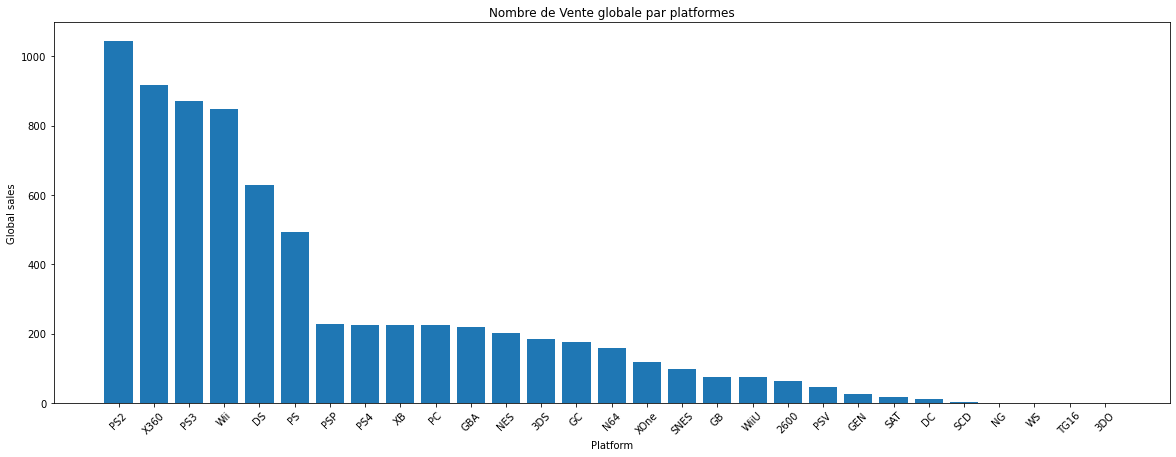

In [3]:
# CA par platforme: platforme la plus utilisée
plt.figure(figsize=(20,7))
df_plf_glo=df.groupby('Platform', as_index = False).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)
plt.bar(df_plf_glo['Platform'], df_plf_glo['Global_Sales'])
plt.xlabel('Platform')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title('Nombre de Vente globale par platformes');

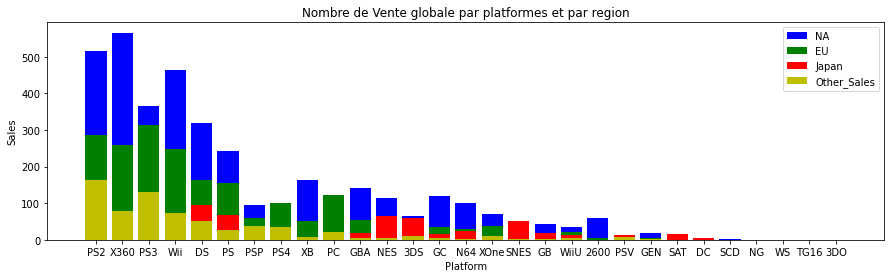

In [4]:
plt.figure(figsize=(15,4))
df_reg_pla = df.groupby('Platform', as_index = False).agg({'NA_Sales':'sum','EU_Sales':'sum'
                                                           ,'JP_Sales':'sum','Other_Sales':'sum'
                                                          ,'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)
plt.bar(df_reg_pla['Platform'],df_reg_pla['NA_Sales'], color='blue',label='NA')
plt.bar(df_reg_pla['Platform'],df_reg_pla['EU_Sales'], color='green',label='EU')
plt.bar(df_reg_pla['Platform'],df_reg_pla['JP_Sales'], color='r',label='Japan')
plt.bar(df_reg_pla['Platform'],df_reg_pla['Other_Sales'], color='y',label='Other_Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Nombre de Vente globale par platformes et par region')
plt.legend()

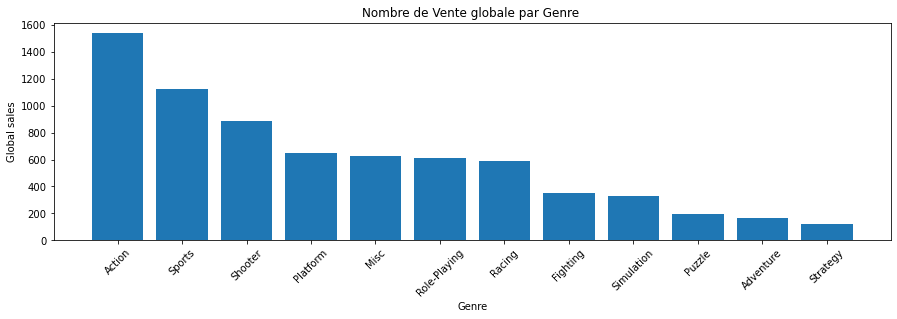

In [5]:
plt.figure(figsize=(15,4))
df_gen_glo = df.groupby('Genre', as_index = False).agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)
plt.bar(df_gen_glo['Genre'], df_gen_glo['Global_Sales'])
plt.xlabel('Genre')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title('Nombre de Vente globale par Genre ');

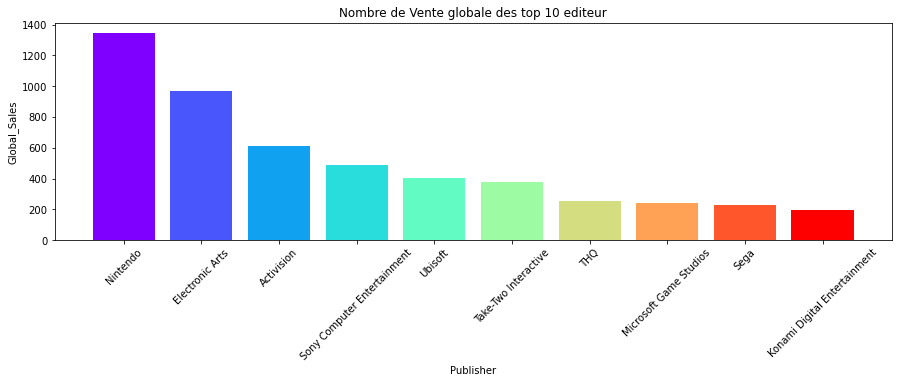

In [6]:
plt.figure(figsize=(15,4))
df_group2=df.groupby('Publisher',as_index = False).agg({'Global_Sales':'sum'})
top10 = df_group2.sort_values('Global_Sales', ascending = False).head(10)
plt.bar(top10['Publisher'], top10['Global_Sales'],color = cm.rainbow(np.linspace(0, 1, len(top10))))
plt.xlabel('Publisher')
plt.ylabel('Global_Sales')
plt.xticks(rotation = '45')
plt.title("Nombre de Vente globale des top 10 editeur");

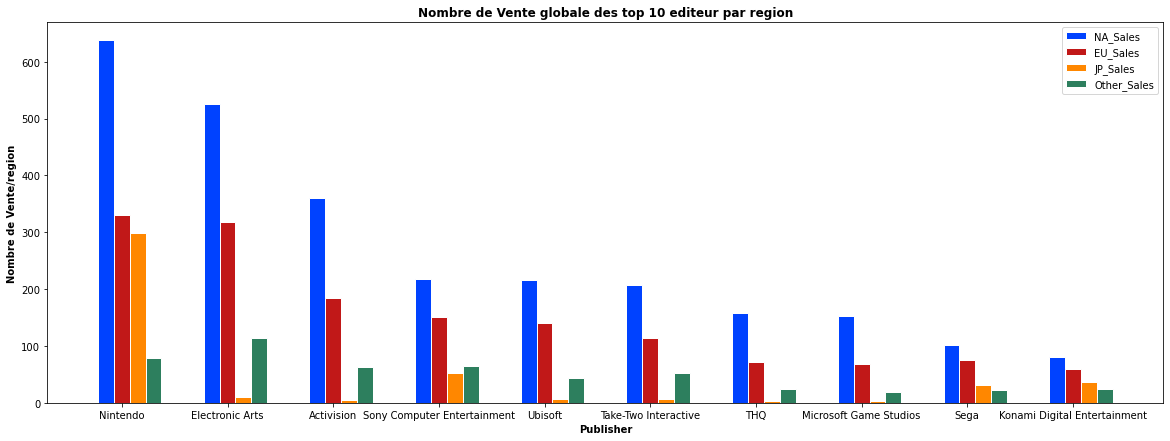

In [7]:
df_reg_publi = df.groupby(df['Publisher'], as_index = False).agg({'NA_Sales':'sum','EU_Sales':'sum'
            ,'JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).sort_values('Global_Sales'
             , ascending=False).head(10)
# set width of bars
barWidth = 0.15
 
# Set position of bar on X axis
r1 = np.arange(len(df_reg_publi['Publisher']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.figure(figsize=(20,7))
plt.bar(r1, df_reg_publi['NA_Sales'], color='#0042ff', width=barWidth, edgecolor='white', label='NA_Sales')
plt.bar(r2, df_reg_publi['EU_Sales'], color='#c11818', width=barWidth, edgecolor='white', label='EU_Sales')
plt.bar(r3, df_reg_publi['JP_Sales'], color='#ff8700', width=barWidth, edgecolor='white', label='JP_Sales')
plt.bar(r4, df_reg_publi['Other_Sales'], color='#2d7f5e', width=barWidth, edgecolor='white', label='Other_Sales')


plt.xlabel('Publisher', fontweight='bold')
plt.ylabel('Nombre de Vente/region', fontweight='bold')
plt.title("Nombre de Vente globale des top 10 editeur par region", fontweight='bold');
plt.xticks([r + barWidth for r in range(len(df_reg_publi['Publisher']))], df_reg_publi['Publisher']);
plt.legend()

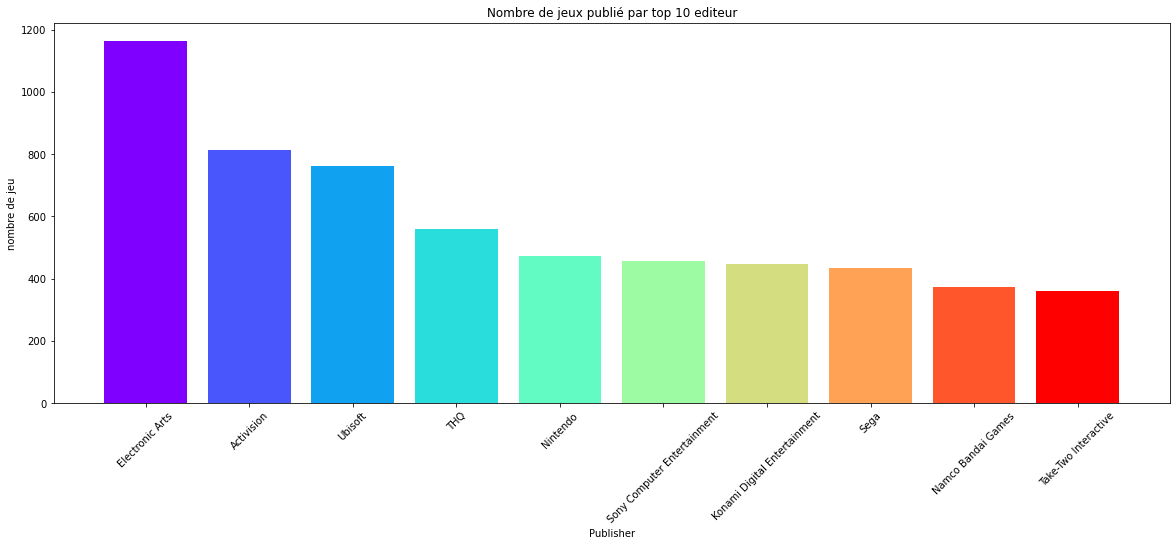

In [23]:
#df_count_game=df[['Name','Publisher']]
df_count_game=df.groupby(df['Publisher'], as_index = False).agg({'Name':'count'}).sort_values('Name', ascending=False).head(10)
df_count_game
plt.figure(figsize=(20,7))
plt.bar(df_count_game['Publisher'], df_count_game['Name'],color = cm.rainbow(np.linspace(0, 1, len(df_count_game))))
plt.xlabel('Publisher')
plt.ylabel('nombre de jeu')
plt.xticks(rotation = '45')
plt.title("Nombre de jeux publié par top 10 editeur");

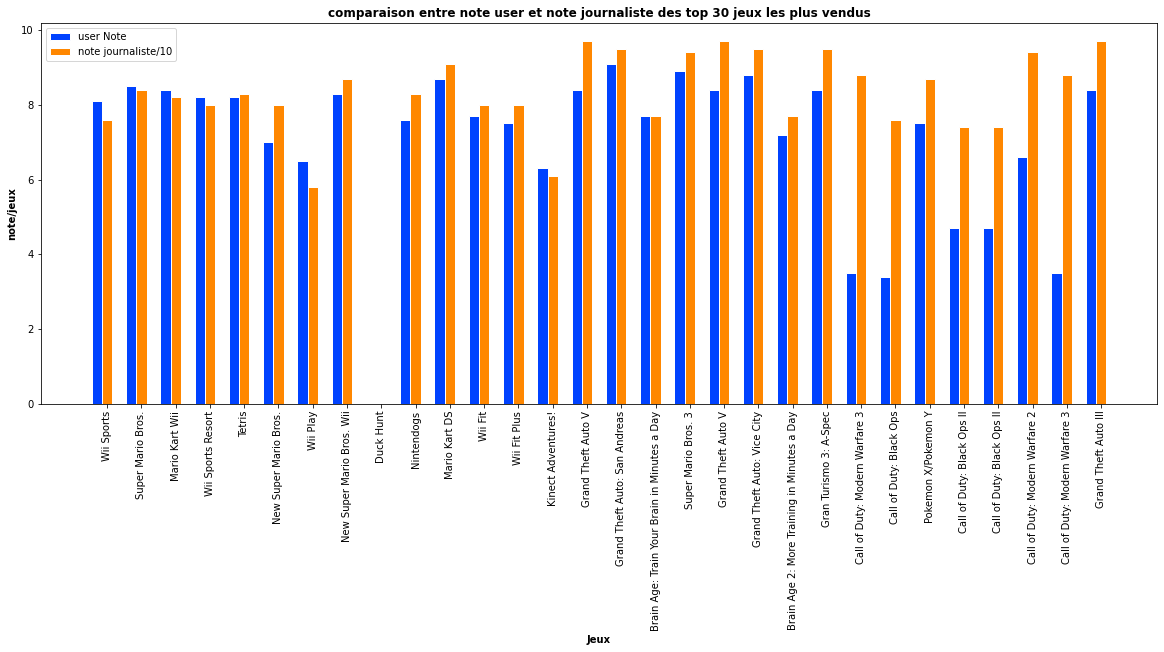

In [29]:
df_vote=df[['Name','userNote','metaNote','metaNoteQ','Global_Sales' ]].sort_values('Global_Sales', ascending=False).head(30)
z=[]
for i in df_vote['metaNote']:
    z.append(i/10)
df_vote['metaNote']=z

# set width of bars
barWidth = 0.30
 
# Set position of bar on X axis
r1 = np.arange(len(df_vote['Name']))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.figure(figsize=(20,7))
plt.bar(r1, df_vote['userNote'], color='#0042ff', width=barWidth, edgecolor='white', label='user Note')
plt.bar(r2, df_vote['metaNote'], color='#ff8700', width=barWidth, edgecolor='white', label='note journaliste/10')



plt.xlabel('Jeux', fontweight='bold')
plt.ylabel('note/jeux', fontweight='bold')
plt.title("comparaison entre note user et note journaliste des top 30 jeux les plus vendus", fontweight='bold');
plt.xticks([r + barWidth for r in range(len(df_vote['Name']))], df_vote['Name'])
plt.xticks(rotation = '90')
plt.legend();

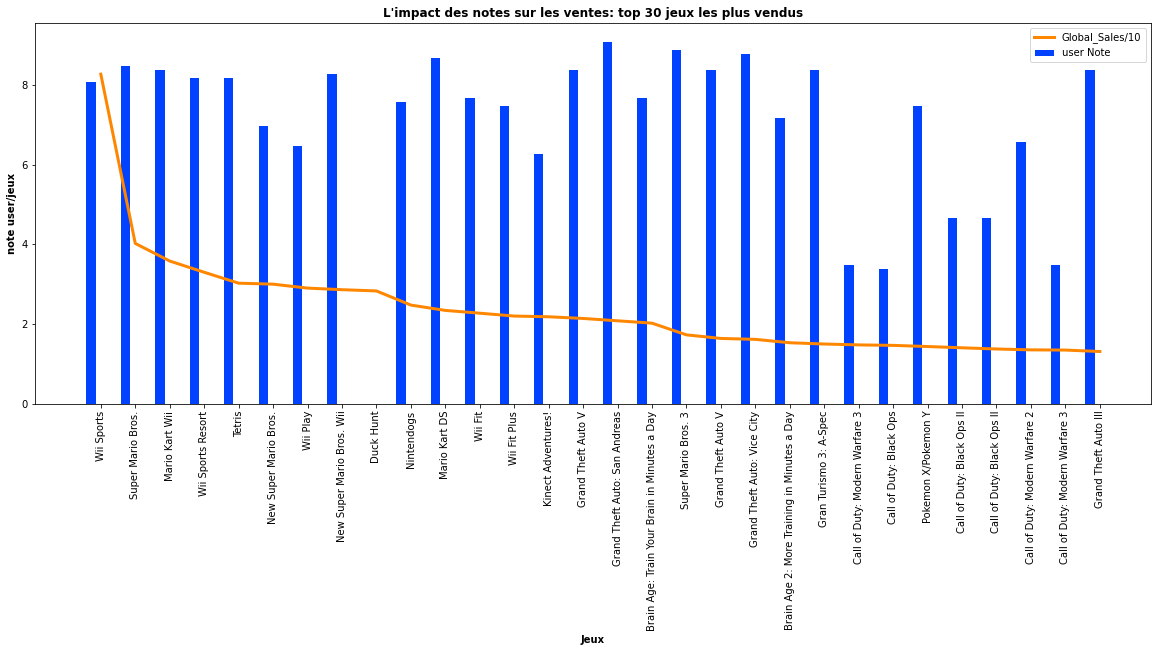

In [32]:
df_vote=df[['Name','userNote','metaNote','metaNoteQ','Global_Sales' ]].sort_values('Global_Sales', ascending=False).head(30)
z=[]
for i in df_vote['Global_Sales']:
    z.append(i/10)
df_vote['Global_Sales']=z

# set width of bars
barWidth = 0.30
 
# Set position of bar on X axis
r1 = np.arange(len(df_vote['Name']))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.figure(figsize=(20,7))
plt.bar(r1, df_vote['userNote'], color='#0042ff', width=barWidth, edgecolor='white', label='user Note')
plt.plot(r2, df_vote['Global_Sales'],linewidth=3, color='#ff8700', label='Global_Sales/10')



plt.xlabel('Jeux', fontweight='bold')
plt.ylabel('note user/jeux', fontweight='bold')
plt.title("L'impact des notes sur les ventes: top 30 jeux les plus vendus", fontweight='bold');
plt.xticks([r + barWidth for r in range(len(df_vote['Name']))], df_vote['Name'])
plt.xticks(rotation = '90')
plt.legend();